In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv(r'data/dataset_malwares.csv')
df.head(5)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
1,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
2,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
3,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
4,VirusShare_eff7676f69be2b519f3424def92d3590,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,8,96,0,0,53248,69632,0,664744


In [5]:
used_data = df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)
y = df['Malware']
used_data, y

(       e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
 0        23117     144     3       0          4           0       65535     0   
 1        23117     144     3       0          4           0       65535     0   
 2        23117     144     3       0          4           0       65535     0   
 3        23117     144     3       0          4           0       65535     0   
 4        23117      80     2       0          4          15       65535     0   
 ...        ...     ...   ...     ...        ...         ...         ...   ...   
 19604    23117     144     3       0          4           0       65535     0   
 19605    23117     144     3       0          4           0       65535     0   
 19606    23117       0     0       0          0           0           0     0   
 19607    23117     144     3       0          4           0       65535     0   
 19608    23117     144     3       0          4           0       65535     0   
 
        e_sp  

In [12]:
features=['Characteristics',
          'SizeOfStackReserve',
          'SectionMinEntropy',
          'DllCharacteristics',
        'SizeOfHeaders'
         ]

In [13]:
used_data = used_data[features]

In [14]:
len(used_data), len(y)

(19609, 19609)

In [15]:
#Train the model, predict classes on test data and calculate prediction scores
X_train, X_test, y_train, y_test = train_test_split(used_data, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
print(len(X_train), len(X_test), len(X_valid))
print(len(y_train), len(y_test), len(y_valid))

12549 3922 3138
12549 3922 3138


In [18]:
# feature extraction
model = RandomForestClassifier(n_estimators=12,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=42)

Text(0.5, 1.0, 'Features importance')

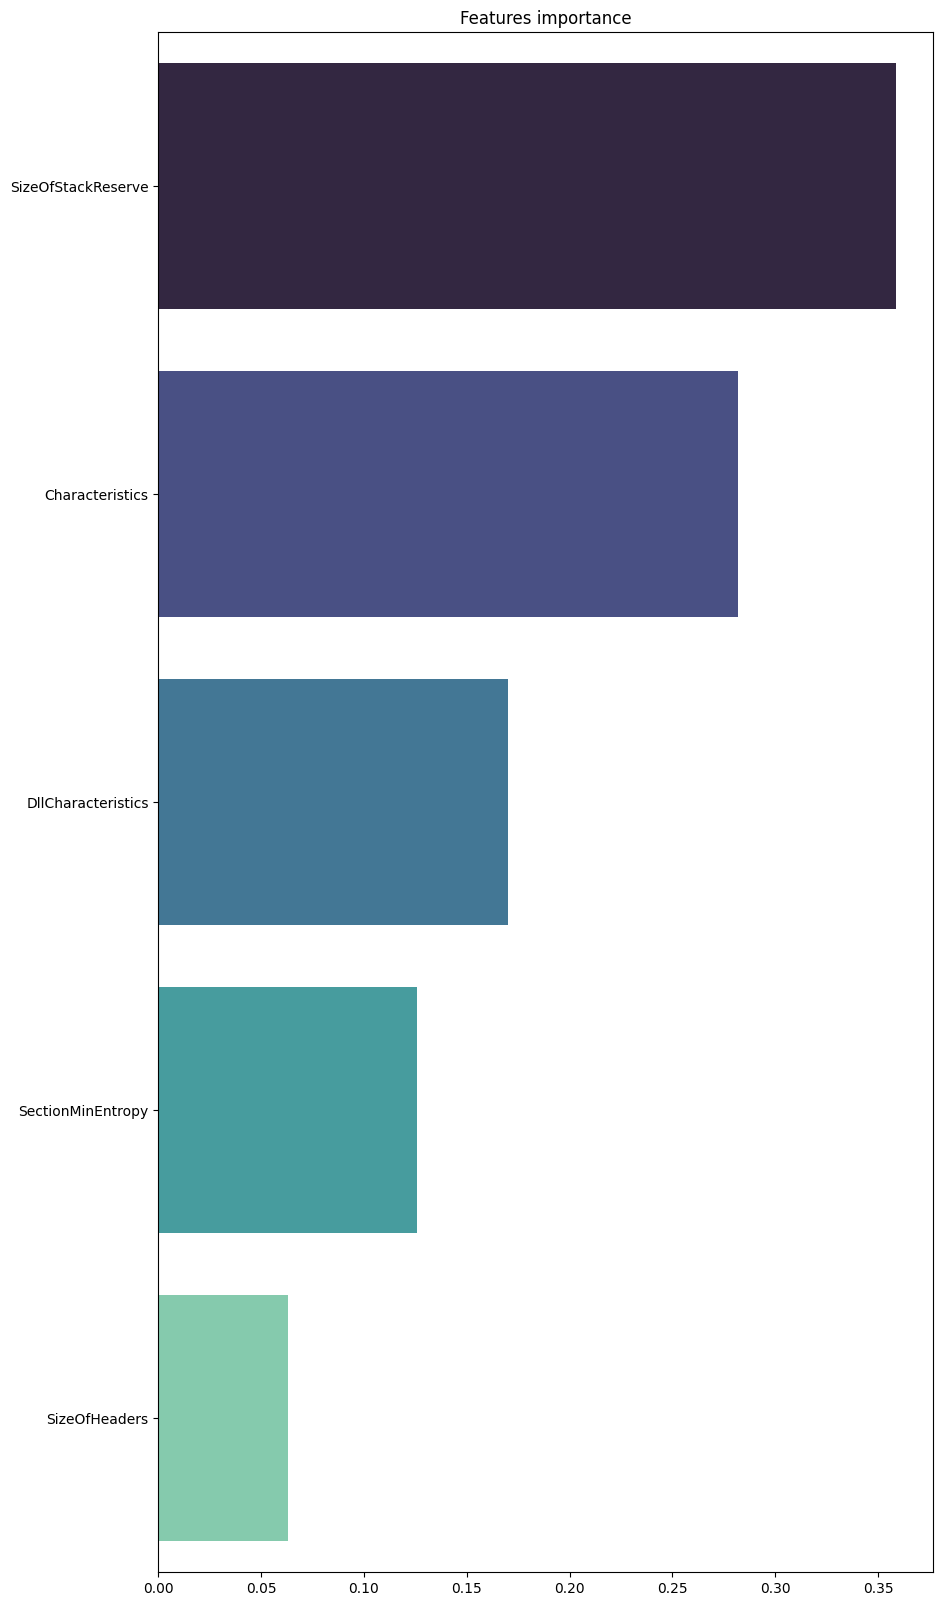

In [19]:
importance = model.feature_importances_
importance_dict = {used_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

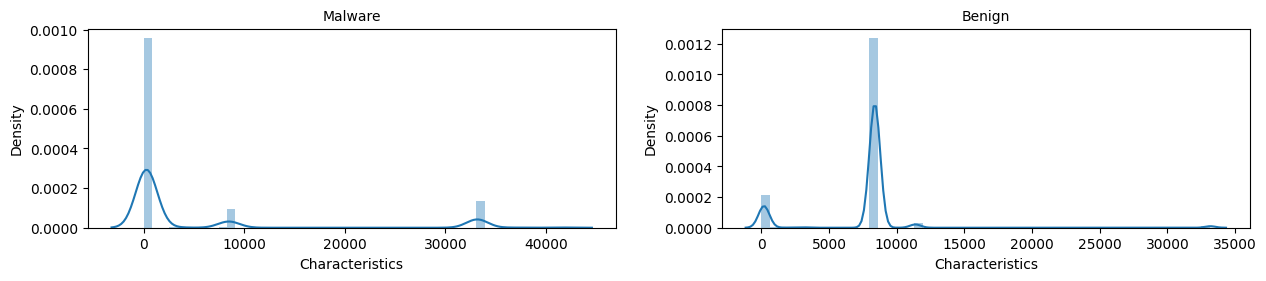

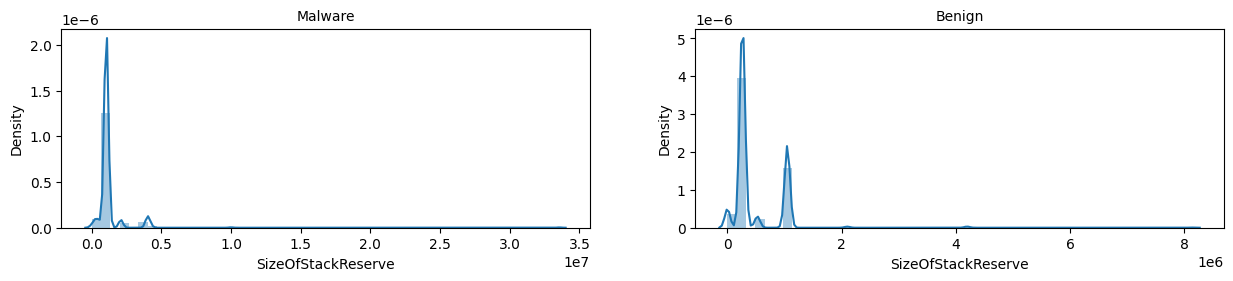

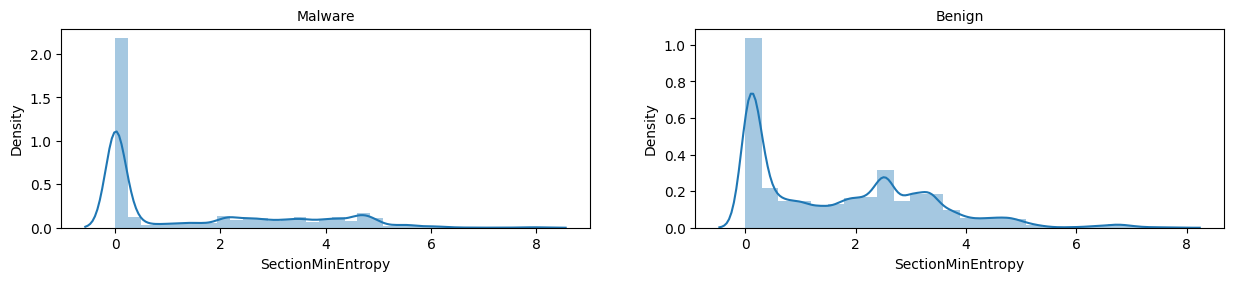

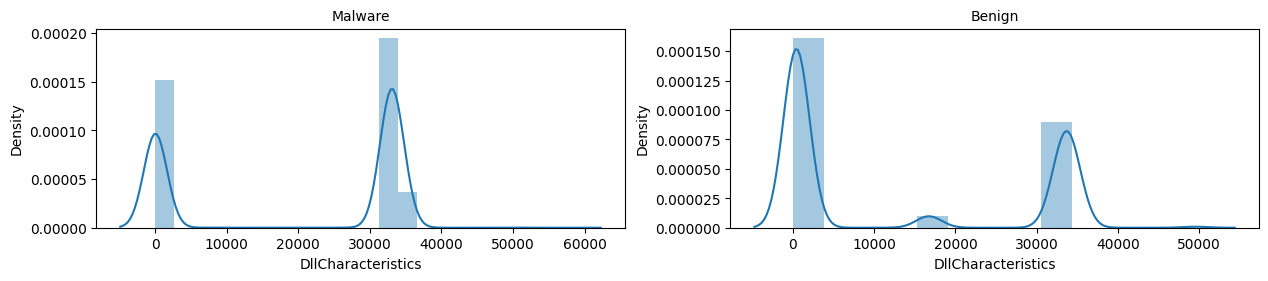

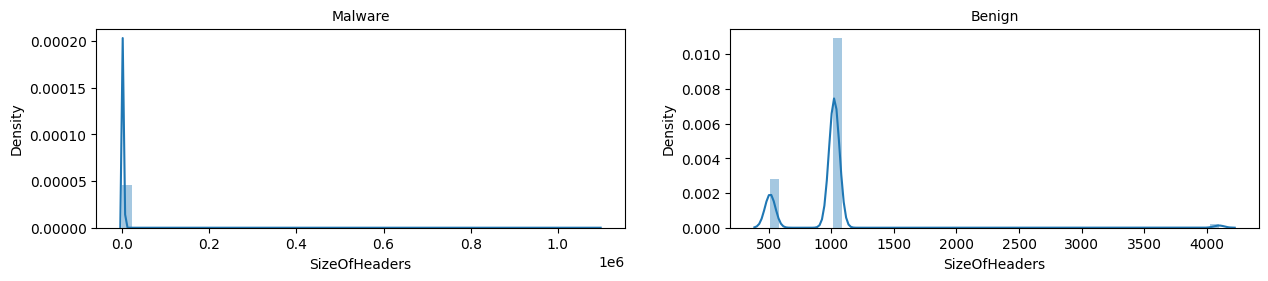

In [20]:
i=1

for feature in features:
    plt.figure(figsize=(15, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(df[df['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(df[df['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
y_test_pred = model.predict(X_test)
y_valid_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)

In [26]:
acc_train = accuracy_score(y_train, y_train_pred)
acc_valid = accuracy_score(y_valid, y_valid_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on training Data: {:.3f}".format(acc_train))
print("Accuracy on Validation Data: {:.3f}".format(acc_valid))
print("Accuracy on test Data: {:.3f}".format(acc_test))

Accuracy on training Data: 0.991
Accuracy on Validation Data: 0.975
Accuracy on test Data: 0.978


In [29]:
print(classification_report(y_test, y_test_pred))
print(classification_report(y_valid, y_valid_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1016
           1       0.98      0.99      0.99      2906

    accuracy                           0.98      3922
   macro avg       0.98      0.97      0.97      3922
weighted avg       0.98      0.98      0.98      3922

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       825
           1       0.98      0.99      0.98      2313

    accuracy                           0.97      3138
   macro avg       0.97      0.96      0.97      3138
weighted avg       0.97      0.97      0.97      3138

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3170
           1       0.99      1.00      0.99      9379

    accuracy                           0.99     12549
   macro avg       0.99      0.99      0.99     12549
weighted avg       0.99      0.99      0.99     12549



[[ 960   56]
 [  30 2876]]


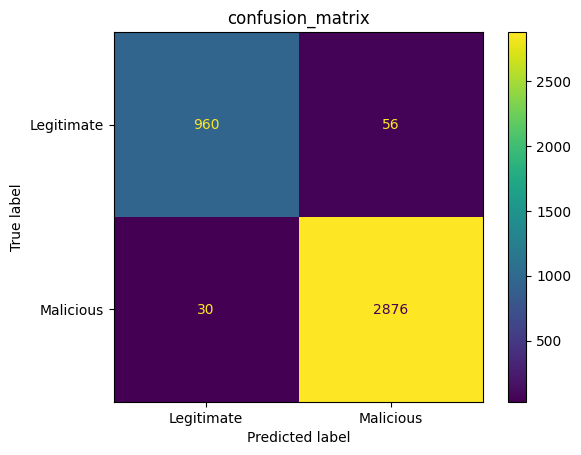

In [30]:
con_mat = confusion_matrix(y_test, y_test_pred)
print(con_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = ["Legitimate", "Malicious"])
cm_display.plot()
plt.title("confusion_matrix")
plt.show()

In [ ]:
pkl_filename = "malware_detection.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)